In [ ]:
!pip install openpyxl
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import math



In [ ]:
train_data_location = "/content/train_data.xlsx"
test_data_location = "/content/test_data.xlsx"
train_data = pd.read_excel(train_data_location)
test_data = pd.read_excel(test_data_location)



In [ ]:
train_info = train_data.info()
test_info = test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

In [ ]:
train_data.head()

customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0       7200       Individual       253.99            Verified         4648   
1       6000       Individual       233.52     Source Verified        14051   
2       8000       Individual       287.50            Verified        14885   
3      10000       Individual       336.22     Source Verified         7542   
4      10000       Individual       237.80            Verified         6318   

   emp_length  loan_status  
0          11            0  
1          11            1  
2          11            0  
3           2            1  
4          11            0

In [ ]:
test_data.head()

customer_id transaction_date sub_grade        term home_ownership  \
0     77298290       2016-04-01        C3   36 months       MORTGAGE   
1     78339737       2016-04-01        D5   36 months           RENT   
2     76302428       2016-04-01        E1   60 months           RENT   
3     74994638       2016-04-01        C4   36 months       MORTGAGE   
4     76995373       2016-04-01        D4   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          690                6    120000.0     13.67  debt_consolidation   
1          700                6     61277.0     19.99               house   
2          660                5     92000.0     19.99               house   
3          670                5    150000.0     14.46      small_business   
4          660                5     68000.0     18.99         credit_card   

   loan_amnt application_type  installment verification_status  account_bal  \
0      20000       Individual       680.36        Not Verified         9248   
1       9450       Individual       351.15            Verified         1929   
2      12700       Individual       336.41     Source Verified         7428   
3      25000       Individual       860.04        Not Verified         7993   
4      16000       Individual       414.97        Not Verified         8647   

   emp_length  loan_status  
0          11            1  
1           0            0  
2           3            1  
3           3            1  
4          11            1

In [ ]:
# Step 1: Understand the data structure and target variable

# Checking for missing values in the training dataset
missing_values_train = train_data.isnull().sum()

# Remove Duplicates
duplicate_values_train = train_data.drop_duplicates()

# Checking the class distribution for the target variable `loan_status`
loan_status_distribution = train_data['loan_status'].value_counts(normalize=True) * 100

print("Duplicates\n\n",duplicate_values_train)
print("\n\n\n")
print("Missing Values\n\n",missing_values_train)
print("\n\n\n")
print("LoanStatusDistribution\n\n",loan_status_distribution)


Duplicates

         customer_id transaction_date sub_grade        term home_ownership  \
0          10608026       2014-01-01        C5   36 months       MORTGAGE   
1          10235120       2014-01-01        E5   36 months       MORTGAGE   
2          10705805       2014-01-01        D2   36 months       MORTGAGE   
3          11044991       2014-01-01        B4   36 months       MORTGAGE   
4          10161054       2014-01-01        C3   60 months       MORTGAGE   
...             ...              ...       ...         ...            ...   
113700     75790158       2016-03-01        D1   36 months           RENT   
113701     74641781       2016-03-01        D2   36 months            OWN   
113702     73712850       2016-03-01        D1   36 months           RENT   
113703     72713907       2016-03-01        C5   36 months       MORTGAGE   
113704     75820776       2016-03-01        E1   60 months       MORTGAGE   

        cibil_score  total_no_of_acc  annual_inc  int_rate  \


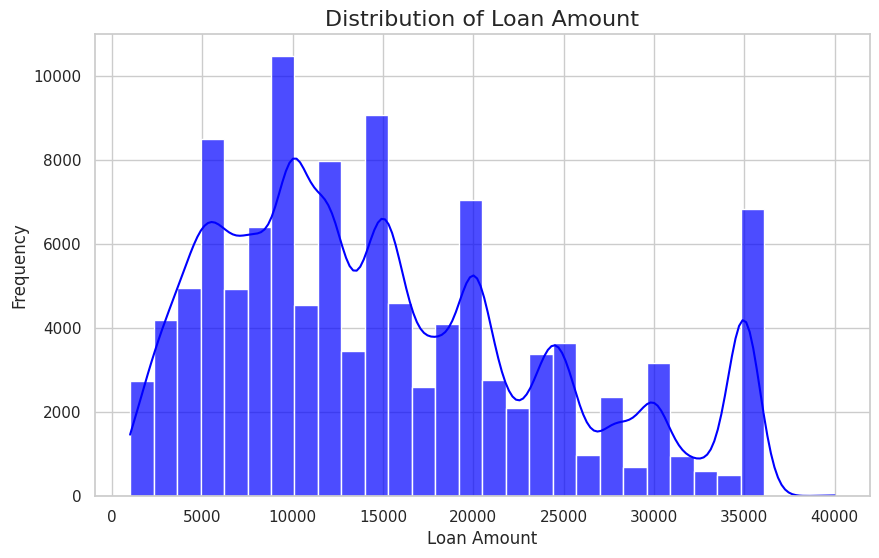

count    113705.000000
mean      15158.144980
std        9091.279851
min        1000.000000
25%        8000.000000
50%       13300.000000
75%       20225.000000
max       40000.000000
Name: loan_amnt, dtype: float64

In [ ]:
# Setting up the plot style
sns.set(style="whitegrid")

# Distribution of `loan_amnt`
plt.figure(figsize=(10, 6))
sns.histplot(train_data['loan_amnt'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title("Distribution of Loan Amount", fontsize=16)
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Basic statistics for `loan_amnt`
loan_amnt_stats = train_data['loan_amnt'].describe()
loan_amnt_stats


# Step 2: Univariate Analysis

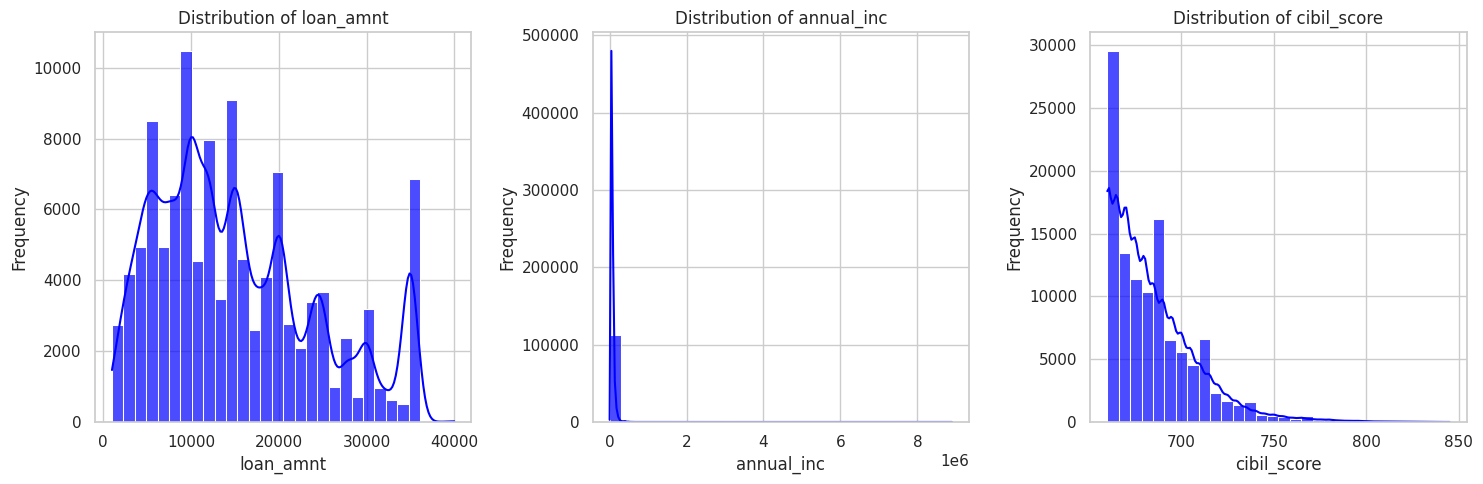

In [ ]:

# Numerical Features
# Distribution of numerical features (loan_amnt, annual_inc, cibil_score)
numerical_features = ['loan_amnt', 'annual_inc', 'cibil_score']
plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.histplot(train_data[feature], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


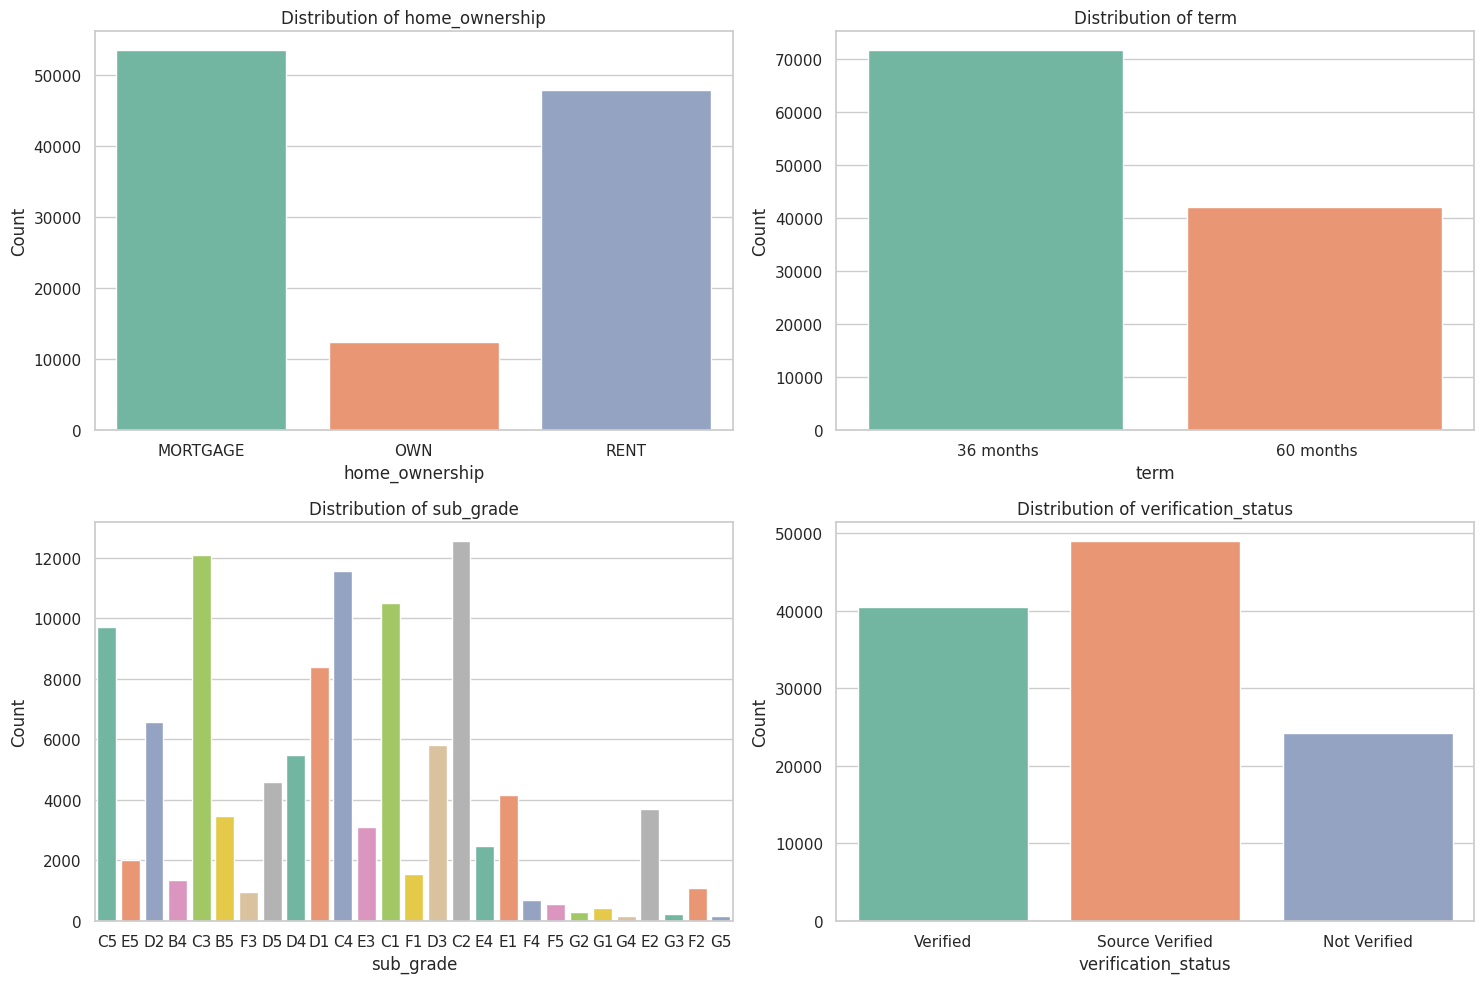

In [ ]:
# Categorical Features

# Distribution of categorical features
categorical_features = ['home_ownership', 'term', 'sub_grade', 'verification_status']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, len(categorical_features)//2, i)
    sns.countplot(x=train_data[feature], palette="Set2")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


# Step 3: Bivariate Analysis

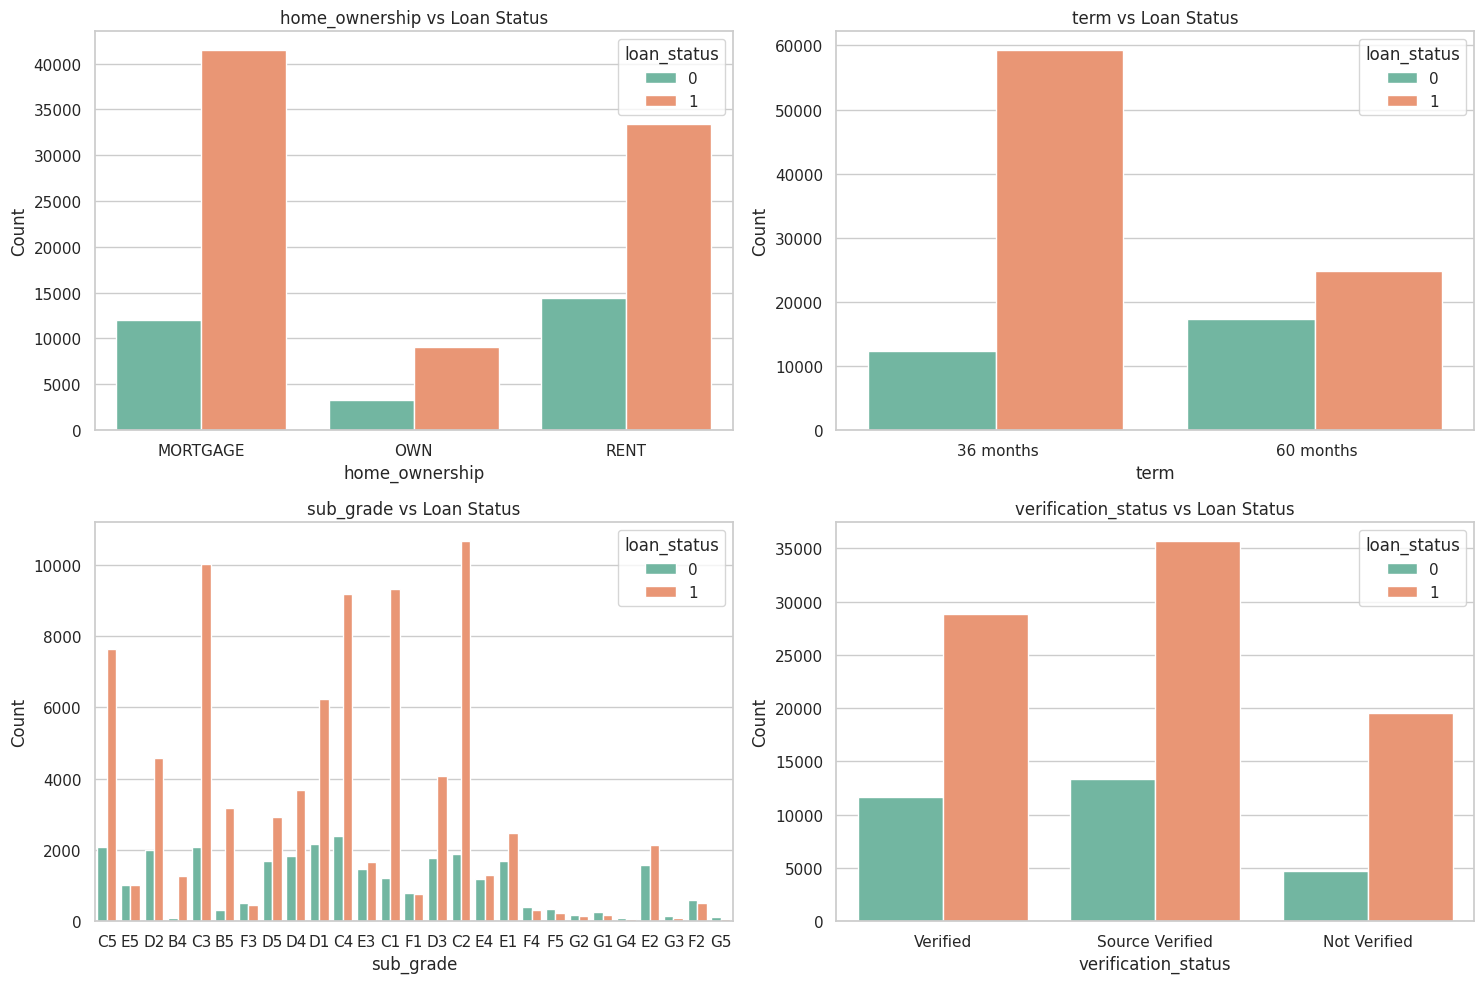

In [ ]:
# Categorical vs Target Analysis
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, len(categorical_features)//2, i)
    sns.countplot(x=train_data[feature], hue=train_data['loan_status'], palette="Set2")
    plt.title(f"{feature} vs Loan Status")
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


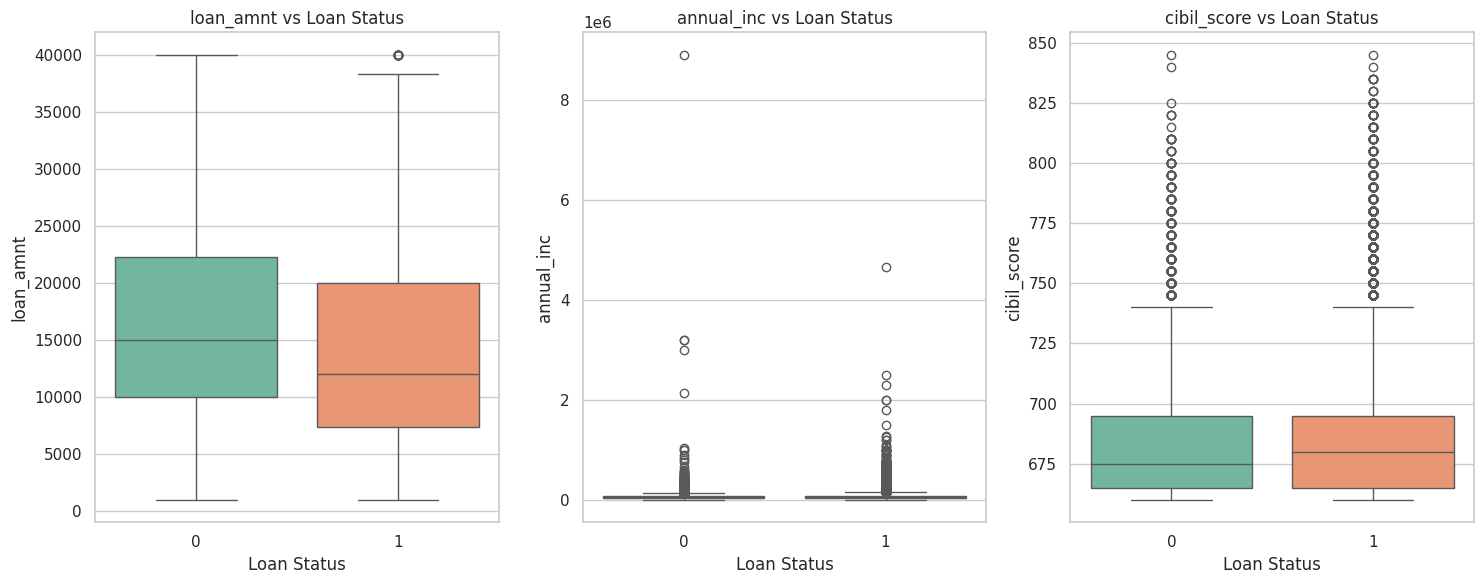

In [ ]:
# Numerical vs Target Analysis
plt.figure(figsize=(15, 6))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(x='loan_status', y=feature, data=train_data, palette="Set2")
    plt.title(f"{feature} vs Loan Status")
    plt.xlabel('Loan Status')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


# Step 4: Multivariate Analysis

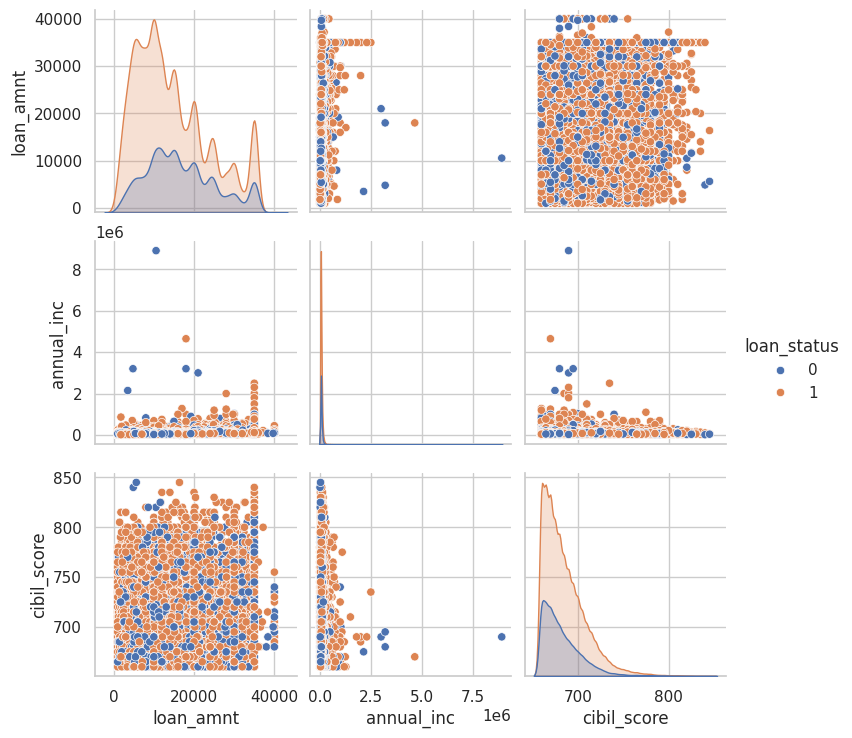

In [ ]:
# Pairplot for numerical features

sns.pairplot(train_data[['loan_amnt', 'annual_inc', 'cibil_score', 'loan_status']], hue='loan_status')
plt.show()


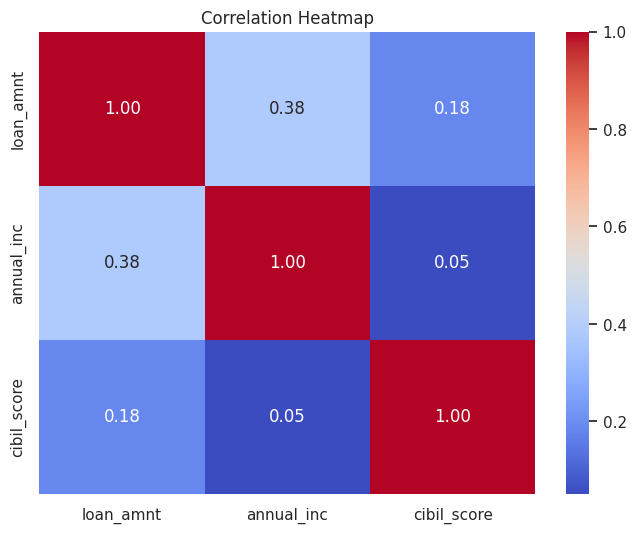

In [ ]:
# Correlation heatmap

correlation_matrix = train_data[['loan_amnt', 'annual_inc', 'cibil_score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Step 5: Feature Engineering

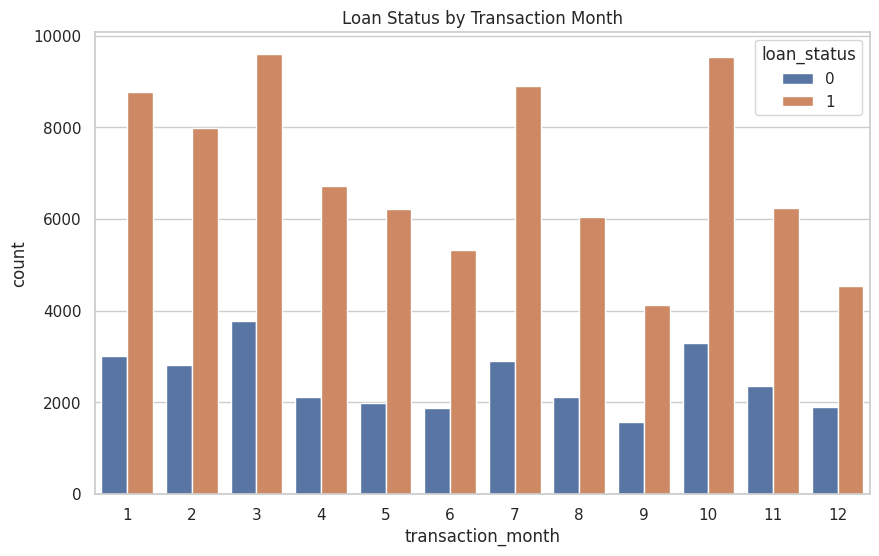

In [ ]:
# Extracting features from transaction_date
train_data['transaction_date'] = pd.to_datetime(train_data['transaction_date'])
train_data['transaction_month'] = train_data['transaction_date'].dt.month
train_data['transaction_year'] = train_data['transaction_date'].dt.year
train_data['transaction_day'] = train_data['transaction_date'].dt.dayofweek

# Analyzing the new features
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_month', hue='loan_status', data=train_data)
plt.title("Loan Status by Transaction Month")
plt.show()


# Step 6 Outlier Detection

In [ ]:
Q1 = train_data['loan_amnt'].quantile(0.25)
Q3 = train_data['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
outliers = train_data[(train_data['loan_amnt'] < (Q1 - 1.5 * IQR)) |
                      (train_data['loan_amnt'] > (Q3 + 1.5 * IQR))]
print(outliers)

        customer_id transaction_date sub_grade        term home_ownership  \
108169     75305069       2016-03-01        C3   36 months       MORTGAGE   
108778     74574299       2016-03-01        E3   60 months           RENT   
109134     74994192       2016-03-01        E3   60 months       MORTGAGE   
109143     74725504       2016-03-01        E5   60 months       MORTGAGE   
109211     74775218       2016-03-01        C5   60 months       MORTGAGE   
109227     74491605       2016-03-01        E1   60 months            OWN   
109265     75152087       2016-03-01        C5   60 months       MORTGAGE   
109271     75183099       2016-03-01        C4   36 months       MORTGAGE   
109578     74653835       2016-03-01        C2   60 months       MORTGAGE   
109982     74725200       2016-03-01        C2   36 months       MORTGAGE   
110259     75242306       2016-03-01        E3   60 months            OWN   
110371     75123857       2016-03-01        D4   60 months       MORTGAGE   

# Step 7: Final Insights

Income Analysis: "Higher income borrowers are less likely to default."

Loan Amounts: "Small loans tend to have a higher default rate."

Credit Scores: "Lower credit scores are strongly correlated with defaults."

Home Ownership: "Renters have a higher default rate compared to homeowners."